In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/Iris.csv")

In [3]:
missing = df.isnull().values.any()

In [4]:
if missing == True:
    df = df.ffill().bfill()
    print("null values filled")
else:
     print("no null values encountered")

null values filled


In [5]:
label = preprocessing.LabelEncoder() 

In [6]:
object_col = df.select_dtypes(include=['object']).columns

In [7]:
for name in object_col:
    df[name] = label.fit_transform(df[name]) 

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
X = df.iloc[:,:-1]
Y = df[df.columns[-1]]

In [10]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=.3,random_state =23)
classi=LazyClassifier(verbose=0,predictions=True)

In [11]:
models_c,predictions_c=classi.fit(X_train, X_test, Y_train, Y_test)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 42.25it/s]


In [12]:
models_c

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.02
LabelPropagation,1.00,1.00,None,1.00,0.01
SVC,1.00,1.00,None,1.00,0.01
SGDClassifier,1.00,1.00,None,1.00,0.01
RandomForestClassifier,1.00,1.00,None,1.00,0.11
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
NuSVC,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.02
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02


In [13]:
# models_c.to_csv("test.csv")

In [14]:
df = pd.DataFrame(models_c)

In [15]:
df = df.reset_index()

In [16]:
df

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,LinearSVC,1.00,1.00,None,1.00,0.02
1,LabelPropagation,1.00,1.00,None,1.00,0.01
2,SVC,1.00,1.00,None,1.00,0.01
3,SGDClassifier,1.00,1.00,None,1.00,0.01
4,RandomForestClassifier,1.00,1.00,None,1.00,0.11
5,QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
6,NuSVC,1.00,1.00,None,1.00,0.02
7,LogisticRegression,1.00,1.00,None,1.00,0.02
8,LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
9,LabelSpreading,1.00,1.00,None,1.00,0.01


In [17]:
# df=pd.read_csv("test.csv")

In [18]:
df.columns

Index(['Model', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
       'Time Taken'],
      dtype='object')

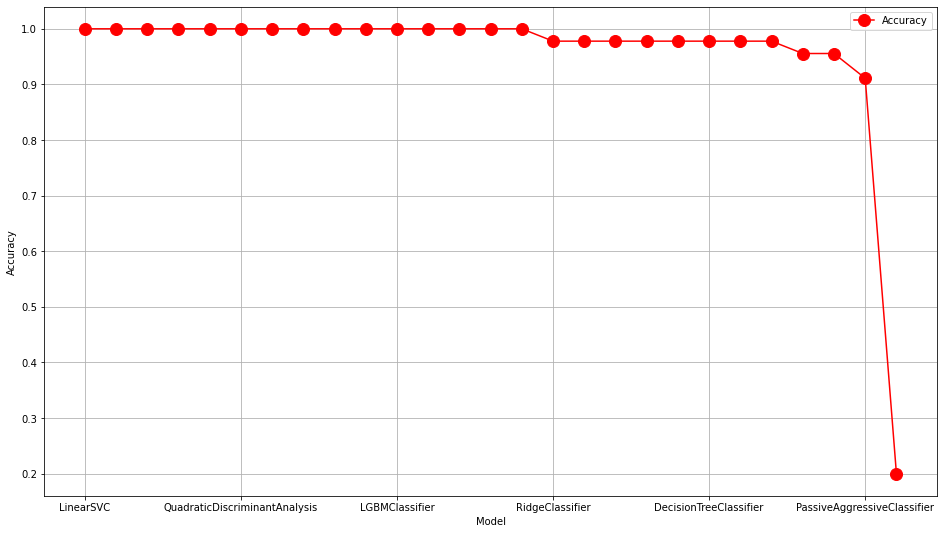

In [19]:
plt.rcParams["figure.figsize"] =[16,9]
df.plot(x="Model",y="Accuracy",color="Red",kind="line",marker='o',markersize=12)
plt.xlabel("Model")
plt.ylabel('Accuracy')
plt.grid()
plt.show()